# Les tris sur des listes

# Mise en place du contexte, objectifs

## Listes d'éléments totalement ordonnés

Soit $L$ une liste comportant donc un nombre fini d'éléments que l'on note $L=[a_0,a_1,\cdots,a_{n-1}]$ de façon que la liste $L$ comporte exactement $n$ éléments (ou occurrences).

On dit que la liste $L$ **a ses éléments totalement ordonnés**, ou bien que la liste $L$ est **totalement ordonnée** si les occurrences $a_k$ de la liste $L$ appartiennent à un ensemble sur lequel on dispose d'une relation d'ordre totale.

Par conséquent, tous les éléments de la liste $L$ sont comparables les uns aux autres.

## Deux contextes différents de listes totalement ordonnées

On considèrera par la suite essentiellement deux types de listes totalement ordonnées :
    
$\quad$  $\rhd$ les <u>listes numériques</u> comportant des occurrences de type flottant (**float**) ou entier (**int**). A noter que les listes comportant des complexes sont à exclure. La relation d'ordre totales sur ces occurrences numériques sont la relation habituelle $\leq$ sur l'ensemble $\mathbb{R}$ des réels.
    
$\quad$    $\rhd$ les listes comportant des <u>chaînes de caractères</u> (de type **str**). L'ordre total habituel sur ces chaînes est l'ordre lexicographique. A noter que les majuscules sont ordonnées avant les minuscules. Cette relation d'ordre est associée au code ASCII permettant de coder sur un octet 256 symboles alpha-numériques.

## Objectifs 

L'objectif sous-jacent à ce chapitre est double :

$\quad$ $\longrightarrow$ élaborer des scripts *Python* qui permettent de trier des listes totalement ordonnées -- c'est-à-dire à partir d'une liste $L=[a_0,\cdots,a_{n-1}]$ d'occurrences totalement ordonnées, de fournire la liste $M=[b_0,\cdots,b_{n-1}]$ de telle sorte que les occurrences de $L$ et de $M$ sont globalement identiques à ordre près et les occurrences de la liste $M$ sont rangées dans l'ordre croissant : $\forall k\in\lbrace 0,\cdots,n-2\rbrace$, $b_k\leq b_{k+1}$

$\quad$ $\longrightarrow$ comparer différentes méthodes de tris par le biais de la complexité des algorithmes rencontrés.

# Différents tris ... première partie

## Le tri par sélection

### Principe

A partir d'une liste $L=[a_0,\cdots,a_{n-1}]$ totalement ordonnée :

$\quad$ $\bullet$ on sélectionne le plus petit élément de la liste $L$ que l'on place dans une liste temporaire

$\quad$ $\bullet$ on sélectionne ensuite le plus petit élément de la sous-liste de $L$ dans $a_0$ que l'on place en deuxième position dans la liste temporaire

$\quad$ $\bullet$ ainsi de suite ...

$\quad$ $\bullet$ au bout de $(n-1)$ étapes, la liste temporaire est la liste triée.

### Implémentation

Voici un script relativement à cet algorithme. Plutôt que d'échanger des éléments de la liste $L$, on choisit de sélectionner les éléments minimaux puis de les stocker dans une liste à part et de les enlever progressivement de la liste de départ.

In [14]:
def Tri_Par_Selection(L) :
    """ trie par la méthode de sélection """
    Liste_Temp=L.copy()
    Liste_A_Remplir=[]
    while Liste_Temp!=[] :
        Minimum=Liste_Temp[0]
        for x in Liste_Temp[1:] :
            if x<Minimum :
                Minimum=x
        Liste_A_Remplir.append(Minimum)
        Liste_Temp.remove(Minimum)
    return Liste_A_Remplir

### Tests ###

from pylab import *
from random import *

L=[randint(0,10) for k in range(30)]
print("Liste de départ : ")
print(L)
print("Liste triée :")
print(Tri_Par_Selection(L))

Liste de départ : 
[4, 0, 7, 10, 9, 10, 7, 10, 9, 6, 8, 5, 10, 7, 10, 3, 1, 7, 4, 10, 8, 1, 6, 9, 10, 9, 4, 1, 0, 5]
Liste triée :
[0, 0, 1, 1, 1, 3, 4, 4, 4, 5, 5, 6, 6, 7, 7, 7, 7, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10]


### Complexité

La complexité se calcule en fonction de la taille de l'entrée, c'est-à-dire ici l'entier $n$ donnant la longueur de la liste $L$ à trier.

Dans le script, à chaque étape dans la boucle **while**, la liste $Liste$_$Temp$ perd toujours un élément, étant partie de la liste $L$ de départ. Ainsi, la boucle **while** est traversée $n$ fois. Ensuite, à chaque exécution à l'intérieur de la boucle **while**, il y a ${\cal O}(p)$ opérations, avec $p$ la longueur de la liste $Liste$_$Temp$.

On en déduit que la complexité est en : $\displaystyle \sum_{p=1}^n {\cal O}(p)={\cal O}\left(\sum_{p=1}^n p\right)={\cal O}\left(\frac{n(n+1)}{2}\right)={\cal O}(n^2)$.

On a une complexité quadratique !

## Le tri par insertion

### Principe

A partir d'une liste $L=[a_0,\cdots,a_{n-1}]$ totalement ordonnée :

$\quad$ $\bullet$ on parcourt la liste du début vers la fin

$\quad$ $\bullet$ à chaque élément rencontré, on l'ordre parmi les éléments déjà rencontrés

$\quad$ $\bullet$ ainsi de suite ...

$\quad$ $\bullet$ une fois la liste $L$ totalement parcourue, la liste temporaire est la liste $L$ triée.

### Implémentation

Voici un script Python possible par itérations :

In [15]:
def Tri_Par_Insertion(L) :
    Liste_A_Remplir=[]
    for x in L :
        bonne_place=0
        while bonne_place<len(Liste_A_Remplir) and Liste_A_Remplir[bonne_place]<x :
            bonne_place+=1
        # ici, bonne_place indique l'endroit oiù placer x dans Liste_A_Remplir
        Liste_A_Remplir=Liste_A_Remplir[:bonne_place]+[x]+Liste_A_Remplir[bonne_place:]
    return Liste_A_Remplir


from random import *

L=[randint(0,10) for k in range(30)]
print("Liste de départ : ")
print(L)
print("Liste triée :")
print(Tri_Par_Insertion(L))

Liste de départ : 
[1, 5, 9, 3, 6, 10, 1, 8, 10, 8, 3, 2, 1, 1, 0, 2, 1, 2, 0, 0, 8, 10, 9, 8, 3, 5, 10, 7, 8, 7]
Liste triée :
[0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 5, 5, 6, 7, 7, 8, 8, 8, 8, 8, 9, 9, 10, 10, 10, 10]


### Complexité

Le pire des cas est lorsqu'il faut parcourir toute la liste $L$ (ce qui se produit à chaque fois) et qu'en plus, à chaque fois, il faut parcourir toute la liste en cours de traitement (c'est le cas lorsque la liste $L$ est déjà triée...) On a donc une complexité en $\displaystyle {\cal O}\left(\sum_{k=1}^n k\right)={\cal O}(n^2)$.

## Le tri à bulles 

### Principe

Dans un verre d'eau, les bulles ont tendance à remonter à la surface. Pour le tri à bulles, c'est pareil ! Ce sont non pas des bulles, mais des éléments les plus petits (ou *légers*) qui remonteront si l'on décrit les occurrences verticalement.

Etant donnée une liste $L$ totalement ordonnée, 

$\quad$ $\rhd$ tant qu'il existe dans la liste $L$ deux éléments consécutifs $L[k]$ et $L[k+1]$ tels que $L[k]>L[k+1]$, alors on échange les termes $L[k]$ et $L[k+1]$ ;

$\quad$ $\rhd$ lorsqu'il n'y a plus de changements à produire sur la liste, c'est que celle-ci est triée comme il faut.

### Implémentation

In [16]:
def Tri_A_Bulles(L) :
    """ trie la liste L par le tri à bulles """
    Test_Echange=True
    Liste_Temp=L.copy()  
    while Test_Echange :  
        Test_Echange=False
        for k in range(len(L)-1) :
            if Liste_Temp[k]>Liste_Temp[k+1] :
                Liste_Temp[k],Liste_Temp[k+1]=Liste_Temp[k+1],Liste_Temp[k]
                Test_Echange=True
    return Liste_Temp

from random import *

L=[randint(0,10) for k in range(30)]
print("Liste de départ : ")
print(L)
print("Liste triée :")
print(Tri_A_Bulles(L))

Liste de départ : 
[7, 8, 7, 9, 7, 8, 0, 2, 2, 4, 8, 5, 10, 6, 5, 4, 4, 7, 1, 6, 4, 10, 6, 5, 0, 8, 10, 1, 3, 10]
Liste triée :
[0, 0, 1, 1, 2, 2, 3, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 10, 10, 10, 10]


### Complexité

Calculons maintenant la complexité de cet algorithme, en fonction de la longueur $n$ de la liste d'entrée $L$.

Pour estimer un ordre de grandeur du nombre d'opérations élémentaires à effectuer, il faut envisager tous les
cas, en particulier les cas les plus défavorables pour l'algorithme.

- dans le cas général, après $n$ évaluations de la condition $Test$_$Echange$ dans la boucle **while**, on est sûr que la liste sera bien
ordonnée. Après la première exécution de la boucle **for**, la liste $Liste$_$Temp$ présente son terme maximal en dernière position. Après la deuxième exécution de la boucle **for**, la liste $Liste$_$Temp$ présente ses deux termes maximaux en dernières positions et placés dans le bon ordre. En réitérant le raisonnement, au bout de $n$ exécutions de la boucle **for**, la liste $Liste$_$Temp$ est bien ordonnée.
    
- chaque boucle **for** met en jeu ${\cal O}(n)$ opérations élémentaires car on parcourt à chaque fois toute la liste $Liste$_$Temp$.
    
La complextié de l'algorithme du tri à bulles est quadratique en ${\cal O}(n^2)$ et ceci se produit effectivement lors du cas le plus défavorable où les $n-1$ premiers termes de liste $L$ sont bien ordonnés et que le dernier terme est strictement inférieur au premier. Dans ce cas, à chaque boucle **for**, il y a un seul échange et il faut effectuer $n-1$ fois la boucle **for** pour ramener le dernier terme de $L$ au début de $Liste$_$Temp$.

## Arbres binaires

### Définitions

On rappelle qu'un **graphe orienté** est la donnée d'un couple $(S,{\cal A})$, où $S$ est un ensemble et ${\cal A}$ est une partie de l'ensemble couples $(r,s)\in S^2$, avec $r\neq s$. 

Les éléments $s$ de l'ensemble $S$ sont appelés **sommets** et les éléments $(r,s)$ de ${\cal A}$ sont appelés **arètes orientées**.

Un graphe $G=(S,{\cal A})$ peut donc se représenter en identifiant chaque sommet à un point et en reliant deux sommets différents par une ligne ou une courbe orientée de la première composant du couple vers la seconde.

Dans la suite, on dit que le sommet $r$ est relié au sommet $s$ si $(r,s)\in {\cal A}$. On remarquera que $r$ peut être relié à $s$ mais que $s$ peut ne pas être relié à $r$.

Un **arbre** est un graphe ne possédant aucun **cycle**, c'est-à-dire que l'on ne peut trouver d'éléments $s_1,\cdots,s_n$ tous différents avec $n\geq 3$ tels que pour tout $k$ entre $1$ et $n-1$, le sommet $s_k$ est relié au sommet $s_{k+1}$ et le sommet $s_n$ est relié au sommet $s_1$.

On dit qu'un arbre est **binaire** si chaque sommet est relié à soit aucun soit deux autres sommets. Les sommets reliés à aucun autre sont appelés les **feuilles**, alors que les sommets $s$ pour lesquels il n'existe pas de sommets $r$ reliés à $s$ sont appelées les **racines**.

On dit qu'un arbre est **connexe**, si on peut passer de n'importe quel sommet $r$ à n'importe quel autre sommet $s$ en transitant par une chaîne $(t_0,\cdots,t_p)$ avec $t_0=r$, $t_p=s$ et pour tout $k\in \lbrace 0,\cdots,p-1\rbrace$, $(t_k,t_{k+1})\in {\cal A}$ ou $(t_{k+1},t_{k})\in {\cal A}$.

Un arbre binaire connexe possède donc une seule racine (sinon, il serait impossible de relier deux racines par une chaîne de sommets). De chaque sommet $s$ qui n'est pas une feuille descendent deux arêtes vers deux sommets $s_1$ et $s_2$  : les sommets $s_1$ et $s_2$ sont appelés **fils de $s$**, alors que le sommet $s$ est appelé **père des sommets $s_1$ et $s_2$**.

On dit qu'un arbre binaire connexe est **complet** si toutes les feuilles appartiennent à au maximum deux générations différentes, c'est-à-dire que la profondeur de chaque feuille (distance ou nombre d'arètes séparant la racine de l'arbre binaire connexe de la feuille considérée ne diffère d'une autre profondeur que d'une unité au maximum.

Voici une petite application graphique demandant de rentrer le nombre $n$ de sommets et l'interface dessine un arbre binaire connexe complet comportant $n$ sommets où les feuilles de la dernière génération sont placées à gauche :

In [17]:
from tkinter import *

absc_centre=400  # recadrage du noeud initial en abscisse

ord_depart=40  # recadrage du noeud initial en ordonnée

unite_larg=150

Temps_Attente=50 

def Generation(k) : 
    """création de la liste des noeuds de la génération k """
    if k==0 :
        return [absc_centre]
    else :
        return Tri_A_Bulles([x-unite_larg/2**(k-1) for x in Generation(k-1)] + [x+unite_larg/2**(k-1) for x in Generation(k-1)])

def Numero_Gen(n) :
    """ renvoie le numéro de la génération à laquelle appartient n """
    k=0
    while 2**(k+1)<=n :
        k+=1
    return k

def Place(n) :
    global unite_haut
    k=Numero_Gen(n)
    
    return [Generation(k)[n-2**k],ord_depart+k*unite_haut]
    

    
def dessin_arbre() :
    """ dessine l'arbre binaire complet à n sommets """
    global n,unite_haut
    canevas.delete(ALL)
    n=Nbre.get() # n est une chaîne de caractères
    n=int(eval(n)) # n est maintenant un entier
    unite_haut=350/(Numero_Gen(n)+1)
    Liste_Noeuds=list(range(1,n+1))
    while len(Liste_Noeuds)>0 :
        Noeud=Liste_Noeuds[0]
        if 2*Noeud+1<=n :
            fenetre.after(Temps_Attente)
            canevas.create_line(Place(Noeud)[0],Place(Noeud)[1],Place(2*Noeud)[0],Place(2*Noeud)[1],fill="magenta")
            canevas.create_line(Place(Noeud)[0],Place(Noeud)[1],Place(2*Noeud+1)[0],Place(2*Noeud+1)[1],fill="magenta")
            fenetre.update()
        if 2*Noeud==n :
            fenetre.after(Temps_Attente)
            canevas.create_line(Place(Noeud)[0],Place(Noeud)[1],Place(2*Noeud)[0],Place(2*Noeud)[1],fill="magenta")
            fenetre.update()
        fenetre.after(Temps_Attente)
        canevas.create_text(Place(Noeud)[0],Place(Noeud)[1],text=str(Noeud),font="Arial 12")
        fenetre.update()
        Liste_Noeuds.remove(Noeud)    
################# Gestion de l'interface graphique ###################
fenetre=Tk()


titre=Label(fenetre,text="Construction d'un arbre binaire connexe complet",
font='Arial 25',fg='red')
titre.pack() # mise en place du titre


canevas=Canvas(fenetre,width=800,height=400,bg="#FFFFCC") # code couleur en hexadécimal
canevas.pack() 



Texte=Label(fenetre,text="Nombre de sommets de l'arbre :",font='Arial 12',fg="blue")
Texte.pack(side=LEFT)

Nbre=Entry(fenetre)
Nbre.pack(side=LEFT)

bouton_quitter = Button(fenetre, text="Quitter", command=fenetre.quit)
bouton_quitter.pack(side=RIGHT) # mise en place du bouton "Quitter"


bouton_tracer_arbre = Button(fenetre, text="Tracer l'arbre binaire", command=dessin_arbre)
bouton_tracer_arbre.pack(side=RIGHT) # mise en place du bouton "traçage 




fenetre.mainloop() # affichage 
fenetre.destroy()

Pour accéder maintenant à des tris plus élaborés et surtout plus efficaces, nous avons besoin de quelques rudiments sur les graphes

## Le tri fusion

### Principe

Etant donnée une liste $L$ totalement ordonnée, on va créer un arbre binaire qui va ensuite se refermer sur lui-même pour aboutir à la liste triée :

$\quad$ $\rhd$ la racine de l'arbre binaire est la liste $L$

$\quad$ $\rhd$ si $M$ est un noeud de cet arbre, le noeud $M$ admet deux fils qui sont obtenus en scindant la liste $M$ en deux morceaux en son milieu

$\quad$ $\rhd$ on poursuit le processus de scission, jusqu'à obtenir des noeuds égaux à des listes ne comportant au maximum qu'un seul élément (ou bien on a des listes vides)

$\quad$ $\rhd$ on dispose donc d'un arbre binaire, après ces scissions

On referme alors l'arbre de la façon suivante :

$\quad$ $\bullet$ à partir de deux fils adjacents $M$ et $N$, on crée le parent $P$ en fusionnant la liste $M$ dans la liste $N$ par un procédé d'insertion : 

 $\qquad$ $\longrightarrow$  on parcourt les éléments de $M$ et on l'insère à la bonne place dans $N$ de telle sorte d'avoir des termes croissants

 $\qquad$ $\longrightarrow$ on obtient alors à partir de deux sous-listes $M$ et $N$ convenablement triées, une liste $P$ encore correctement triée

$\quad$  $\bullet$ on recommence le processus de fusion autant de fois que nécessaire pour obtenir une génération à un seul élément $L'$

$\quad$ $\rhd$ la liste $L'$ est la liste triée à partir de la liste $L$.

Voici une petite animation formalisant le tri par fusion en terme de graphes binaires montant et descendant :

In [18]:
from tkinter import *

######### Programme pour calculer les tracés sur le canevas ##########

def play_S(): 
    """dessine la génération suivante pour les scissions"""
    global n,bouton_tracer_F,absc_centre,ord_depart,unite_larg,unite_haut
    Nombre=7 # nombre de générations de scissions à tracer 

    
    
    absc_centre=250  # recadrage du noeud initial en abscisse
    
    ord_depart=30  # recadrage du noeud initial en ordonnée
    
    unite_larg=100
    
    

    n=saisie.get()
    n=int(n)
    unite_haut=200/n
    bouton_tracer_S.destroy()
    bouton_tracer_F = Button(fenetre, text="Tracer les fusions", command= play_F)
    bouton_tracer_F.pack(side=RIGHT) # mise en place du bouton "traçage de la seconde partie
    
    for Numero_Gen in range(n) :
        fenetre.update()
        tracer_S(Numero_Gen)
        canevas.after(500)
        
def play_F(): 
    """dessine la génération suivante pour les scissions"""
    global n
    bouton_tracer_F.destroy()
    for Numero_Gen in range(n) :
        fenetre.update()
        tracer_F(Numero_Gen)
        canevas.after(500)
        
def Liste_S(k) : 
    """création de la liste des noeuds de la génération k pour les scissions"""
    if k==0 :
        return [absc_centre]
    else :
        return [x-unite_larg/2**(k-1) for x in Liste_S(k-1)] + [x+unite_larg/2**(k-1) for x in Liste_S(k-1)]


#print(Liste_S(2))  # teste ok



def tracer_S(k):
    for x in Liste_S(k) :
        x1=x-unite_larg/2**k
        x2=x+unite_larg/2**k
        y1=ord_depart+k*unite_haut
        y2=ord_depart+(k+1)*unite_haut
        
        canevas.create_line(x,y1,x1,y2,fill="red")
        canevas.create_line(x,y1,x2,y2,fill="magenta")


def tracer_F(k):
    Liste=Liste_S(n-k)
    Liste.sort() # on réordonne les éléments 
    for i in range(len(Liste)//2) :
        x1=Liste[2*i]
        x2=Liste[2*i+1]
        x=(x1+x2)/2  # le milieu
        decalage=ord_depart+n*unite_haut
        y1=decalage+k*unite_haut
        y2=decalage+(k+1)*unite_haut
        canevas.create_line(x1,y1,x,y2,fill="#9966FF")
        canevas.create_line(x2,y1,x,y2,fill="#99CC33")


  

################# Gestion de l'interface graphique ###################
fenetre=Tk()
#fenetre.geometry("400x400") # définition de la fenêtre

titre=Label(fenetre,text="Animation du graphe lié au tri par fusion",font="Arial 16 bold",fg="red")
titre.pack() # mise en place du titre


canevas=Canvas(fenetre,width=500,height=450,bg="#FFFFCC") # code couleur en hexadécimal
canevas.pack() # mise en place du canevas où va se calculer le tracé du graphe



saisie=Entry()
saisie.pack(side=RIGHT)



zone_De_Texte=Label(fenetre,text="Rentrer le nombre de scissions à effectuer : ")
zone_De_Texte.pack(side=RIGHT)


bouton_quitter = Button(fenetre, text="Quitter", command=fenetre.quit)
bouton_quitter.pack(side=LEFT) # mise en place du bouton "Quitter"




bouton_tracer_S = Button(fenetre, text="Tracer les scissions", command= play_S)
bouton_tracer_S.pack(side=RIGHT) # mise en place du bouton "traçage de la première partie

fenetre.mainloop() # affichage de la fenêtre graphique
fenetre.destroy()


### Implémentation

In [19]:
def scission_Liste(L) :  
    """définit la liste comportant les deux fils de L dans l'arbre binaire initial"""
    p=(len(L)+1)//2
    return [L[:p],L[p:]]

def fusion_Listes(M,N) :  
    """définit la liste fils des deux listes M et N dans l'arbre binaire rétrécissant final"""
    i,liste_A_Remplir=0,[]
    
    if N==[] :
        return M
    else :
        if M==[] : 
            return N
        else :
            fin_M=False  # lors de la fusion, on n'est pas encore à la fin de la liste M
        
            for y in N :
                if not(fin_M) :
                    while M[i]<y :
                        liste_A_Remplir.append(M[i]) # on commence la fusion de M dans N
                        i=i+1
                        if i==len(M) :
                            fin_M=True
                            break
                liste_A_Remplir.append(y) # on insère maintenant l'élément de N
            if not(fin_M) :  # on est arrivé au bout de la liste N mais pas de la liste M
                liste_A_Remplir.extend(M[i:])  # on insère finalement les derniers éléments de M
            return liste_A_Remplir


def successeur_Scission(liste_De_Listes) :  
    """calcule la liste des noeuds de la génération suivante, dans la première partie de l'arbre"""
    arbre_A_Remplir=[]
    for L in liste_De_Listes :
        arbre_A_Remplir.append(scission_Liste(L)[0])
        arbre_A_Remplir.append(scission_Liste(L)[1])
    return arbre_A_Remplir


def successeur_Fusion(liste_De_Listes) :  
    """calcule la liste des noeuds de la génération suivante, dans la seconde partie de l'arbre"""
    arbre_A_Remplir,p=[],len(liste_De_Listes)//2
    for i in range(p) :
        arbre_A_Remplir.append(fusion_Listes(liste_De_Listes[2*i],liste_De_Listes[2*i+1]))
    return arbre_A_Remplir



def nombre_De_Scissions(L) :   
    """calcule le nombre de générations de la première partie de l'arbre (et donc de la seconde partie de l'arbre"""
    n,k=len(L),0
    while 2**k<n :
        k+=1
    return k


def Tri_Fusion(L) :
    noeud_Arbre,k=[L],nombre_De_Scissions(L)
    for j in range(k) :
        noeud_Arbre=successeur_Scission(noeud_Arbre)  
        # parcours dans la première partie du graphe
    for j in range(k) :
        noeud_Arbre=successeur_Fusion(noeud_Arbre)  
        # parcours dans la seconde partie du graphe
    return  noeud_Arbre[0]


L=[randint(0,10) for k in range(30)]
print("Liste de départ : ")
print(L)
print("Liste triée :")
print(Tri_Fusion(L))

Liste de départ : 
[5, 3, 3, 2, 0, 0, 1, 2, 5, 2, 2, 2, 7, 0, 9, 9, 3, 0, 1, 1, 6, 8, 9, 9, 8, 6, 6, 7, 5, 1]
Liste triée :
[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 5, 5, 5, 6, 6, 6, 7, 7, 8, 8, 9, 9, 9, 9]


On peut également formuler un script de tri fusion de manière récursive, sûrement plus facile à lire :

In [20]:

def Fusion(A,B) :
    if A==[] :
        return B
    elif B==[] :
        return A
    else :
        a,b=A[-1],B[-1]
        if a<b :
            return Fusion(A,B[:-1])+[b]
        else :
            return Fusion(A[:-1],B)+[a]
    

    
def Tri_Fusion_Rec(L) :
    if len(L)<=1 :
        return L
    else :
        p=len(L)//2
        return Fusion(Tri_Fusion_Rec(L[:p]),Tri_Fusion_Rec(L[p:]))


In [21]:
L=[randint(0,10) for k in range(30)]
print("Liste de départ : ")
print(L)
print("Liste triée :")
print(Tri_Fusion_Rec(L))

Liste de départ : 
[9, 2, 5, 9, 9, 7, 2, 4, 5, 10, 3, 5, 7, 7, 10, 2, 3, 9, 0, 7, 3, 6, 0, 10, 1, 2, 1, 2, 7, 9]
Liste triée :
[0, 0, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 4, 5, 5, 5, 6, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 10, 10, 10]


### Complexité

La première remarque importante est que dans un arbre binaire connexe complet possédant $N$ sommets, il y a moins de $\log_2(N)$ générations différentes, car le nombre de générations est égal au plus grand entier $k$ tel que $2^k\leq N$, puis $\displaystyle k=\left[\frac{\ln N}{\ln 2}\right]$, avec $[~\cdot ~]$ la partie entière. 

Calculons maintenant la complexité de cet algorithme de tri par fusion.

L'appel de la procédure **scission_Liste(L)** coûte ${\cal O}(longueur(L))$ opérations élémentaires.

L'appel de la procédure **fusion_Liste(M,L)** coûte ${\cal O}(longueur(M)+longueur(N))$ opérations élémentaires, car les listes $M$ et $N$ sont parcourues une seule fois globalement, faisant intervenir un nombre fini et borné d'opérations élémentaires à chaque fois.

La première partie du graphe fait intervenir $k={\cal O}(\log(n))$ opérations de scissions. 

La seconde partie du graphe fera également intervenir $k={\cal O}(\log(n))$ fusions.

Le nombre d'opérations élémentaires pour aboutir à la génération de sous-listes de longueurs inférieures ou égales à 1 est en ${\cal O}(\log(n))\cdot {\cal O}(n)={\cal O}(n\cdot \log(n))$.
Le nombre d'opérations élémentaires pour effectuer toutes les fusions sont en ${\cal O}(n\cdot \log(n))$.

Le coût en ${\cal O}(\log(n))$ dans le calcul du nombre de générations dans le graphe ne change pas le calcul global en terme de complexité.

Au final, l'algorithme de tri par fusion est en ${\cal O}(n\cdot \log(n))$. : il est meilleur que le tri à bulles.

## Le tri Maximier ou le tri par tas

### Définition

Il y a les pommiers qui produisent des pommes, il y a des cerisiers qui produisent des cerises, il y a des bananiers qui produisent des bananes, et puis il y a des **maximiers** qui produisent des maximums.

On appelle **maximier**, un arbre binaire connexe et complet tel que la valeur associée à chaque noeud est toujours supérieure ou égale à la valeur de ses fils. On en déduit que dans n'importe quel maximier, la valeur maximale se trouve à la racine de l'arbre.

On peut remarquer que n'importe quel sous-arbre d'un maximier est encore un maximier. Au lieu de maximier, on parle aussi de **tas**.

### Principe

Etant donnée une liste $L$, le tri par maximier se déroule en deux étapes :
    
$\quad$ $\rhd$ <u>la **plantation du maximier**</u> : on crée à partir des occurrences de la liste $L$, une liste associée à un arbre maximier. Pour cela, on insère successivement les occurrences de la liste $L$, puis on met au bon endroit cet élément dans l'arbre naissant [principe de **percolation**]

$\quad$ $\rhd$ une fois le maximier $M$ construit à partir de $L$, on procède à la **cueillette** :

$\qquad$ $\longrightarrow$ on met dans une liste  $L'$ le fruit du maximier (c'est-à-dire sa valeur maximale), en remplissant $L'$ par la gauche

$\qquad$ $\longrightarrow$ une fois le fruit prélevé (on enlève la racine de $M$), la racine est remplacée par le fils le plus grand, lequel est remplacé par son fils le plus grand, ainsi de suite

$\qquad$ $\longrightarrow$ la dernière feuille (la feuille la plus à droite de la dernière génération de l'arbre maximier $M$) prend alors la dernière place occupée par les permutations de l'étape précédente, puis on remet à jour le maximier pour faire éventuellement graviter cette dernière feuille au bon endroit dans l'arbre (principe de **percolation**)

$\quad$ $\rhd$ on poursuit le processus jusqu'à vider le maximier de tous ses fruits

$\rhd$ la liste $L'$ ainsi construite est la liste triée à partir de $L$.

### Implémentation

In [22]:
def Pousse_Maximier(Arbre,Feuille,Place) :
    """ met à jour un maximier Arbre en insérant Feuille à l'index [Place] """
    Arbre_Temp=Arbre.copy()
    n=len(Arbre)
    if Place==n :
        Arbre_Temp.append(Feuille) # ajout de la nouvelle feuille
    else :
        Arbre_Temp[Place]=Feuille # écrasement le l'ancienne feuille avec la nouvelle 
    Test_Modif=True
    while Test_Modif and Place>0 :
        Test_Modif=False
        Noeud_Pere=(Place-1)//2 # index du noeud parent dans le graphe associé
        if Arbre_Temp[Noeud_Pere]<Arbre_Temp[Place] :
            Arbre_Temp[Noeud_Pere],Arbre_Temp[Place]=Arbre_Temp[Place],Arbre_Temp[Noeud_Pere]
            Place=Noeud_Pere
            Test_Modif=True # met en mémoire une modification de l'arbre
    return Arbre_Temp


def Plantation_Maximier(L) :
    """ on plante le maximier avec les "fruits" de la liste L """
    Arbre_Temp=[]
    for k in range(len(L)) :
        Arbre_Temp=Pousse_Maximier(Arbre_Temp,L[k],k)
    return Arbre_Temp

def Cueillette(Arbre) :
    """ renvoie le nouvel Arbre maximier une fois la racine cueillie """
    k=len(Arbre)-1
    if k==0 :
        return []
    else :
        Arbre_Temp=Arbre.copy()
        Place=0 # index du noeud à remplir
        while 2*Place+2 <= k  : # tant que le noeud-fils droit de l'index [Place] est strictement avant l'index [k]
            Noeud_Fils=2*Place+1
            if Arbre_Temp[Noeud_Fils]>Arbre_Temp[Noeud_Fils+1] : # noeud-fils gauche meilleur que noeud-fils droit
                Place_Fils=Noeud_Fils
            else :
                Place_Fils=Noeud_Fils+1
            Arbre_Temp[Place]=Arbre_Temp[Place_Fils] # le meilleur noeud-fils est transféré dans le noeud à remplir
            Place=Place_Fils
        # Place est l'index du dernier transfert de noeud
        if Place==k :
            return Arbre_Temp[:-1]
        else :
            return Pousse_Maximier(Arbre_Temp[:-1],Arbre_Temp[-1],Place)
 

    
def Tri_Par_Tas(L) :
    """ trie la liste L par le maximier """
    Arbre=Plantation_Maximier(L) # confection du maximier
    Liste_Temp=[]
    while Arbre!=[] :
        Liste_Temp=[Arbre[0]]+Liste_Temp # on récolte le fruit du maximier et on le met par la gauche
        Arbre=Cueillette(Arbre)
    return Liste_Temp

L=[randint(0,10) for k in range(30)]
print("Liste de départ : ")
print(L)
print("Liste triée :")
print(Tri_Par_Tas(L))

Liste de départ : 
[6, 9, 9, 6, 0, 0, 0, 10, 2, 9, 0, 10, 8, 5, 5, 9, 10, 6, 8, 7, 4, 3, 9, 3, 4, 1, 2, 8, 2, 7]
Liste triée :
[0, 0, 0, 0, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 6, 7, 7, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10]


### Complexité

La fonction **Pousse_Maximier** met en jeu ${\cal O}(\log_2(Longueur(Arbre)))$ opérations, car dans un arbre binaire à $n$ sommets, il y a ${\cal O}(\log n)$ générations.

Ensuite, planter la maximier à partir d'une liste de taille $n$ donne un coût en ${\cal O}(n\cdot \log n)$.

La Cueillette donne encore un coût en ${\cal O}(n)$ opérations et le tri en lui-même conduit à $n$ appels de la fonction **Cueillette**.

La complexité du tri par tas est donc en ${\cal O}(n\cdot \log n)$.

## Le tri rapide

### Principe

Etant donnée une liste $L$ totalement ordonnée, le **tri rapide** prend un élément $x$ de la liste $L$, cet élément étant appelé **pivot**. On modife alors la liste $L$ pour ranger dans le désordre les termes inférieurs strictement à $x$ à la gauche de l'occurrence $x$, puis les autres à la droite de $x$. Ainsi, suite à cette opération, l'occurrence $x$ est immédiatement bien placée dans la future liste triée.

On renouvelle cette opération autant de fois que nécessaire pour avoir à trier des sous-listes de longueur $2$ au maximum.

### Implémentation

On choisit ici une implémentation récursive, en choisissant toujours comme pivot, le premier terme de la liste considérée.

In [23]:
def Tri_Rapide(L):
    if L == []: 
        return []
    else :
        return Tri_Rapide([x for x in L[1:] if x < L[0]])+ [L[0]] + Tri_Rapide([x for x in L[1:] if x >= L[0]])

L=[randint(0,10) for k in range(30)]
print("Liste de départ : ")
print(L)
print("Liste triée :")
print(Tri_Rapide(L))

Liste de départ : 
[3, 3, 9, 2, 8, 10, 9, 9, 7, 7, 6, 1, 4, 1, 9, 7, 0, 5, 6, 6, 7, 8, 9, 4, 7, 9, 9, 7, 3, 4]
Liste triée :
[0, 1, 1, 2, 3, 3, 3, 4, 4, 4, 5, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 9, 9, 9, 9, 9, 9, 9, 10]


### Complexité

Sans rentrer dans le détail du calcul de la complexité, ce tri rapide est de complexité en ${\cal O}(n^2)$ dans les cas les plus défavorables car il se peut que l'on doive effectuer ${\cal O}(n)$ fois la récursivité, impliquant à chaque fois un nombre d'opérations en ${\cal O}(n)$.
En moyenne (lorsque le pivot partage les valeurs de la liste en deux moitiés de taille équivalente), la complexité est en ${\cal O}(n\cdot \log(n))$.

Il existe des méthodes pour pallier aux cas défavorables, l'idée est d'implémenter un autre algorithme de tri dès que le nombre d'appels dans la récursivité dépasse une certaine valeur.

# Comparaison sur les différents tris

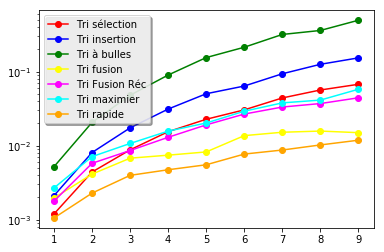

In [24]:
import time

from random import *
from pylab import *

def Production_Liste(n) :
    return [uniform(0,1000) for k in range(n)]

def Differents_Tri(L) :
    print("Liste de départ :")
    print(L)
    print("----------------")
    print("Tri Sélection :")
    print(Tri_Par_Selection(L))
    print("----------------")
    print("Tri Insertion :")
    print(Tri_Par_Insertion(L))
    print("----------------")
    print("Tri à bulles :")
    print(Tri_A_Bulles(L))
    print("----------------")
    print("Tri fusion :")
    print(Tri_Fusion(L))
    print("----------------")
    print("Tri fusion récursif :")
    print(Tri_Fusion_Rec(L))
    print("----------------")
    print("Tri maximier :")
    print(Tri_Par_Tas(L))
    print("----------------")
    print("Tri_Rapide :")
    print(Tri_Rapide(L))
L=[randint(0,100) for k in range(300)]
#Differents_Tri(L)  

def Temps_Calculs(n) :
    """ on forme les listes des temps de calculs sur des listes de taille 1000*k lorsque k varie de 1 à n """
    LX=list(range(1,n+1))
    LY1,LY2,LY3,LY4,LY5,LY6,LY7=[],[],[],[],[],[],[]
    for x in LX :
        L=Production_Liste(100*x)
        t_0=time.clock()
        Tri_Par_Selection(L)
        t_1=time.clock()
        Tri_Par_Insertion(L)
        t_2=time.clock()
        Tri_A_Bulles(L)
        t_3=time.clock()
        Tri_Fusion(L)
        t_4=time.clock()
        Tri_Fusion_Rec(L)
        t_5=time.clock()
        Tri_Par_Tas(L)
        t_6=time.clock()
        Tri_Rapide(L)
        t_7=time.clock()
        LY1.append(t_1-t_0)
        LY2.append(t_2-t_1)
        LY3.append(t_3-t_2)
        LY4.append(t_4-t_3)
        LY5.append(t_5-t_4)
        LY6.append(t_6-t_5)
        LY7.append(t_7-t_6)
    figure()
    semilogy()
    plot(LX,LY1,color="red",marker="o")
    plot(LX,LY2,color="blue",marker="o")
    plot(LX,LY3,color="green",marker="o")
    plot(LX,LY4,color="yellow",marker="o")
    plot(LX,LY5,color="magenta",marker="o")
    plot(LX,LY6,color="cyan",marker="o")
    plot(LX,LY7,color="orange",marker="o")
    legend(('Tri sélection','Tri insertion', 'Tri à bulles','Tri fusion','Tri Fusion Réc','Tri maximier','Tri rapide'),loc='upper left', shadow=True)
    show()
Temps_Calculs(9)       


Dans l'ordre d'arrivée :
    
$\quad$  $\bullet$ tri rapide

$\quad$  $\bullet$ tri fusion

$\quad$  $\bullet$ tri fusion récursif

$\quad$  $\bullet$ tri maximier

$\quad$  $\bullet$ tri sélection

$\quad$  $\bullet$ tri insertion

$\quad$  $\bullet$ tri à bulles

Voici ce que cela change lorsque l'on tente de trier une liste déjà triée $L$.

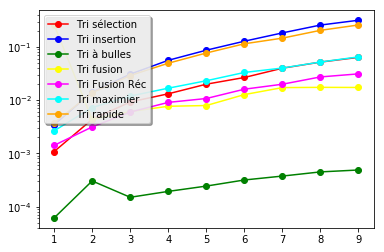

In [25]:
def Temps_Calculs_bis(n) :
    """ on forme les listes des temps de calculs sur des listes triées de taille 1000*k lorsque k varie de 1 à n """
    LX=list(range(1,n+1))
    LY1,LY2,LY3,LY4,LY5,LY6,LY7=[],[],[],[],[],[],[]
    for x in LX :
        L=Production_Liste(100*x)
        L.sort() # tri par la méthode Python
        t_0=time.clock()
        Tri_Par_Selection(L)
        t_1=time.clock()
        Tri_Par_Insertion(L)
        t_2=time.clock()
        Tri_A_Bulles(L)
        t_3=time.clock()
        Tri_Fusion(L)
        t_4=time.clock()
        Tri_Fusion_Rec(L)
        t_5=time.clock()
        Tri_Par_Tas(L)
        t_6=time.clock()
        Tri_Rapide(L)
        t_7=time.clock()
        LY1.append(t_1-t_0)
        LY2.append(t_2-t_1)
        LY3.append(t_3-t_2)
        LY4.append(t_4-t_3)
        LY5.append(t_5-t_4)
        LY6.append(t_6-t_5)
        LY7.append(t_7-t_6)
    figure()
    semilogy()
    plot(LX,LY1,color="red",marker="o")
    plot(LX,LY2,color="blue",marker="o")
    plot(LX,LY3,color="green",marker="o")
    plot(LX,LY4,color="yellow",marker="o")
    plot(LX,LY5,color="magenta",marker="o")
    plot(LX,LY6,color="cyan",marker="o")
    plot(LX,LY7,color="orange",marker="o")
    legend(('Tri sélection','Tri insertion', 'Tri à bulles','Tri fusion','Tri Fusion Réc','Tri maximier','Tri rapide'),loc='upper left', shadow=True)
    show()
Temps_Calculs_bis(9)     

Cette fois-ci c'cest le tri à bulles qui remporte la palme, sans surprise et le tri rapide n'est plus aussi rapide ...